In [2]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

### 凸集
简单地说，如果对于任何$a, b \in \mathcal{X}$，连接$a$和$b$的线段也位于$\mathcal{X}$中，则向量空间中的一个集合$\mathcal{X}$是*凸*（convex）的。
在数学术语上，这意味着对于所有$\lambda \in [0, 1]$，我们得到

$$\lambda  a + (1-\lambda)  b \in \mathcal{X} \text{ 当 } a, b \in \mathcal{X}.$$

如下图所示，第一组存在不包含在集合内部的线段，所以该集合是非凸的，而另外两组则没有这样的问题。

![第一组是非凸的，另外两组是凸的。](../img/pacman.svg)

### 凸函数
现在我们有了凸集，我们可以引入*凸函数*（convex function）$f$。
给定一个凸集$\mathcal{X}$，如果对于所有$x, x' \in \mathcal{X}$和所有$\lambda \in [0, 1]$，函数$f: \mathcal{X} \to \mathbb{R}$是凸的，我们可以得到

$$\lambda f(x) + (1-\lambda) f(x') \geq f(\lambda x + (1-\lambda) x').$$

为了说明这一点，让我们绘制一些函数并检查哪些函数满足要求。
下面我们定义一些函数，包括凸函数和非凸函数。

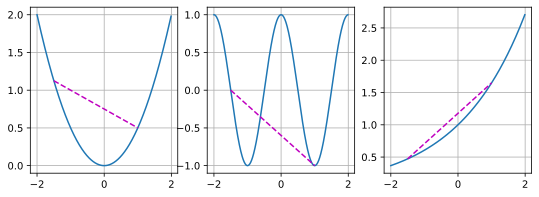

In [3]:
f = lambda x : 0.5 * x ** 2 # 凸函数
g = lambda x : torch.cos(np.pi * x) # 非凸函数
h = lambda x : torch.exp(0.5 * x) # 凸函数

x, segment = torch.arange(-2,2,0.01), torch.tensor([-1.5, 1]) # x为自变量范围，segment为下图虚线范围
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f,g,h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)